# Project 41: Movie Genre Classifier
## Zero-Shot Classification for Plot Summaries

**Goal**: Classify a movie plot summary into "Horror", "Comedy", or "Action" using zero-shot classification.

**Tech**: `pipeline('zero-shot-classification')` with a pre-trained model (e.g., `facebook/bart-large-mnli`).

**Why zero-shot?** No need for labeled training data. We define the class labels upfront and the model predicts which label best matches the text.

## Step 1: Import Libraries & Set Up

In [1]:
from transformers import pipeline
import pandas as pd

# Initialize the zero-shot classification pipeline
# This model can classify text without seeing training examples for those specific labels
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

print('✓ Zero-shot classifier loaded successfully!')

/Users/abhishrutkaushik/Documents/Sem 6/Labs/GenAI/GenAI-Hands-on/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 515/515 [00:00<00:00, 1830.27it/s, Materializing param=model.shared.weight]                                   


✓ Zero-shot classifier loaded successfully!


## Step 2: Define Movie Plot Summaries (Test Data)

In [2]:
# Sample movie plot summaries
plots = [
    "A group of teenagers accidentally opens a cursed mirror in an abandoned mansion. As midnight approaches, ghostly figures emerge from the glass and hunt them one by one. The only way to survive is to break the mirror before dawn—but every break releases more spirits.",
    
    "A bumbling office worker accidentally becomes a superhero when he eats a radioactive sandwich. With newfound powers he doesn't understand, he stumbles through saving the city while making jokes and annoying his boss.",
    
    "A retired spy is pulled back into duty when his daughter is kidnapped by an international crime syndicate. Armed with cutting-edge gadgets and years of combat training, he must infiltrate a fortified island base and take down the villain's entire operation.",
    
    "An old clown doll sits on a shelf for 50 years. When a family moves into the house, the doll comes alive at night, whispering their names and leaving creepy messages on the walls. Soon, family members start disappearing.",
    
    "A struggling comedian books a last-minute gig at a tiny club where nothing goes right—the mic cuts out, a cat crashes the stage, and his ex-girlfriend shows up with her new partner. Chaos and hilarity ensue.",
]

# Define the candidate labels
candidate_labels = ['Horror', 'Comedy', 'Action']

print(f"Testing {len(plots)} movie plot summaries...\n")

Testing 5 movie plot summaries...



## Step 3: Classify Each Plot Summary

In [3]:
# Store results
results = []

for i, plot in enumerate(plots, 1):
    # Run zero-shot classification
    prediction = classifier(plot, candidate_labels)
    
    # Extract top label and confidence
    top_label = prediction['labels'][0]
    top_score = prediction['scores'][0]
    
    results.append({
        'Plot': plot[:80] + '...',  # Truncate for display
        'Predicted Genre': top_label,
        'Confidence': f'{top_score:.2%}',
        'All Scores': prediction
    })
    
    print(f"Plot {i}:")
    print(f"  → Genre: {top_label}")
    print(f"  → Confidence: {top_score:.2%}")
    print(f"  → All scores: {', '.join(f'{label}={score:.2%}' for label, score in zip(prediction['labels'], prediction['scores']))}")
    print()

Plot 1:
  → Genre: Horror
  → Confidence: 61.23%
  → All scores: Horror=61.23%, Action=33.83%, Comedy=4.94%

Plot 2:
  → Genre: Comedy
  → Confidence: 52.47%
  → All scores: Comedy=52.47%, Action=41.02%, Horror=6.51%

Plot 3:
  → Genre: Action
  → Confidence: 77.82%
  → All scores: Action=77.82%, Horror=15.37%, Comedy=6.81%

Plot 4:
  → Genre: Horror
  → Confidence: 73.18%
  → All scores: Horror=73.18%, Action=20.39%, Comedy=6.43%

Plot 5:
  → Genre: Comedy
  → Confidence: 79.49%
  → All scores: Comedy=79.49%, Action=15.22%, Horror=5.29%



## Step 4: Display Results as a Table

In [4]:
# Create a DataFrame for nicer visualization
df = pd.DataFrame([
    {
        'Plot Summary': res['Plot'],
        'Predicted Genre': res['Predicted Genre'],
        'Confidence': res['Confidence'],
    }
    for res in results
])

print("\n📊 CLASSIFICATION RESULTS")
print("=" * 100)
print(df.to_string(index=False))
print("=" * 100)


📊 CLASSIFICATION RESULTS
                                                                       Plot Summary Predicted Genre Confidence
A group of teenagers accidentally opens a cursed mirror in an abandoned mansion....          Horror     61.23%
A bumbling office worker accidentally becomes a superhero when he eats a radioac...          Comedy     52.47%
A retired spy is pulled back into duty when his daughter is kidnapped by an inte...          Action     77.82%
An old clown doll sits on a shelf for 50 years. When a family moves into the hou...          Horror     73.18%
A struggling comedian books a last-minute gig at a tiny club where nothing goes ...          Comedy     79.49%


## Step 5: Custom Classification Function (Reusable)

In [5]:
def classify_movie_genre(plot_summary, verbose=True):
    """
    Classify a movie plot summary into one of three genres.
    
    Args:
        plot_summary (str): The plot description/summary to classify.
        verbose (bool): If True, print detailed results.
    
    Returns:
        dict: Contains 'genre', 'confidence', and 'all_scores'.
    """
    prediction = classifier(plot_summary, candidate_labels)
    
    result = {
        'genre': prediction['labels'][0],
        'confidence': prediction['scores'][0],
        'all_scores': {label: score for label, score in zip(prediction['labels'], prediction['scores'])}
    }
    
    if verbose:
        print(f"📽️  Predicted Genre: {result['genre']}")
        print(f"📊 Confidence: {result['confidence']:.2%}")
        print(f"📈 All Scores: {result['all_scores']}")
    
    return result

# Test the function with a new plot
test_plot = "A lone ranger with a dusty hat rides into a town plagued by bandits. With lightning-fast reflexes and a six-shooter, he takes on the entire gang in an epic showdown."

print("\n🧪 TESTING CUSTOM FUNCTION:")
print(f"Plot: {test_plot}\n")
result = classify_movie_genre(test_plot, verbose=True)


🧪 TESTING CUSTOM FUNCTION:
Plot: A lone ranger with a dusty hat rides into a town plagued by bandits. With lightning-fast reflexes and a six-shooter, he takes on the entire gang in an epic showdown.

📽️  Predicted Genre: Action
📊 Confidence: 84.97%
📈 All Scores: {'Action': 0.8497491478919983, 'Horror': 0.08200972527265549, 'Comedy': 0.06824111193418503}


## Step 6: Confidence Distribution Insight

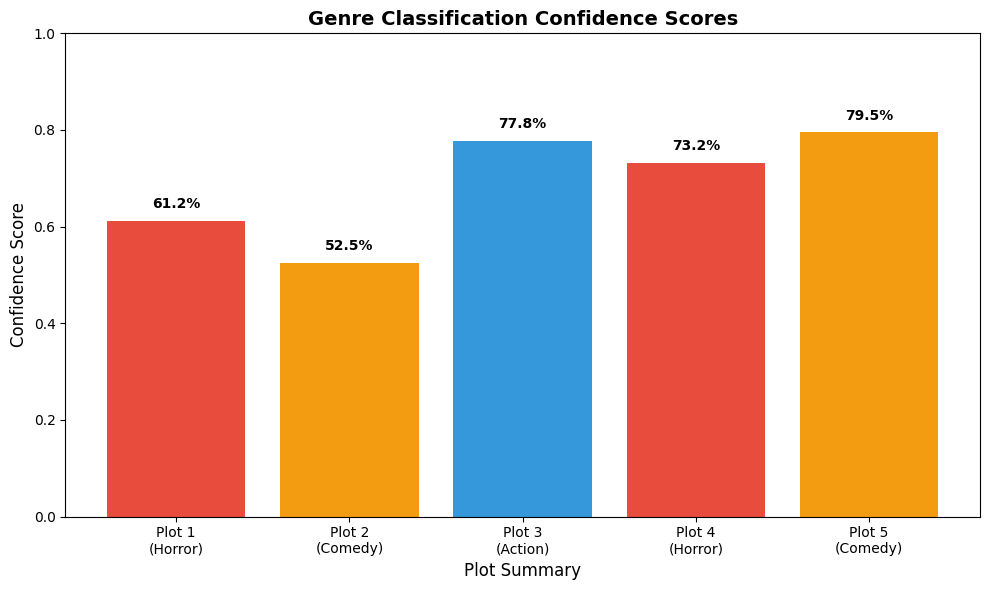


✓ Visualization complete!


In [6]:
# Analyze how confident the model was across all predictions
import matplotlib.pyplot as plt

genres = [res['Predicted Genre'] for res in results]
confidences = [float(res['Confidence'].strip('%')) / 100 for res in results]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(genres)), confidences, color=['#e74c3c', '#f39c12', '#3498db'])
ax.set_ylabel('Confidence Score', fontsize=12)
ax.set_xlabel('Plot Summary', fontsize=12)
ax.set_title('Genre Classification Confidence Scores', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(genres)))
ax.set_xticklabels([f'Plot {i+1}\n({genres[i]})' for i in range(len(genres))], fontsize=10)
ax.set_ylim([0, 1])

# Add value labels on bars
for i, (bar, conf) in enumerate(zip(bars, confidences)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{conf:.1%}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")

## Now to explain why zeroshot classification works

### How It Works:
1. **No Training Required**: Unlike supervised classifiers, you don't need labeled examples of Horror/Comedy/Action plots.
2. **NLI (Natural Language Inference)**: The `facebook/bart-large-mnli` model uses Natural Language Inference to determine if a hypothesis ("This is a Horror film") is entailed by the premise (the plot).
3. **On-the-fly Labels**: You can change the labels at runtime without retraining. Try `['Sci-Fi', 'Romance', 'Drama']` on the same plots!
4. **Flexibility**: Add new genres or modify existing ones instantly.

### Pros & Cons:
✅ **Pros**:
- No labeled training data needed.
- Works for unseen labels.
- Fast to set up and deploy.

❌ **Cons**:
- Less accurate than fine-tuned models on specific labels.
- Slower inference than lightweight classifiers.
- Label wording matters ("Terror" vs "Scary" might give different results).

## Extensions & Ideas

### 🚀 Try These Variations:

1. **Multi-label Classification**: Some plots could be both "Horror" AND "Comedy" (horror-comedy).
   ```python
   classifier(plot, candidate_labels, multi_class=True)
   ```

2. **Custom Genres**: Replace with your own labels:
   ```python
   candidate_labels = ['Sci-Fi', 'Romance', 'Drama', 'Thriller', 'Fantasy']
   ```

3. **Hierarchical Classification**: Classify first by `["Action", "Drama", "Comedy"]`, then sub-classify Action into `["Superhero", "Spy Thriller", "Western"]`.

4. **Interactive CLI**: Build a command-line tool where users paste plot summaries.

5. **Web App Integration**: Use FastAPI/Streamlit to create a web interface for real-time classification.

6. **Batch Processing**: Process 100s of plots from a CSV file and generate a report.